# Chapter 2 Exploratory Data Analysis

Often times the first thing we do when receiving a new data set is to run exploratory analysis on this data to understand the mechanism that generates such data. This might include the analysis of data at hand (e.g., data from pilot studies, metadata from the Internet) in order to design experiments or surveys, as well as the initial analysis of the data set to provide basic description or to detect anomolies, etc. 

It is important to know that the exploratory data analysis means more than data analysis using statistical software. In order to understand the data structure and interpret our findings, it often requires us to read the past analyses, known features, and the documentation of the data set. However, these background research are subject-specific. Hence, in this chapter, we will focus on the data analysis part of exploratory data analysis. 

## 2.1 Background research

Imagine that we have a data set at hand that we need to explore. We know that data can come in many forms (see e.g., Appendix C). Moreover, data from different sources might have different naming rules for even the same variables. We could as well imagine that there are relationships among variables that are well-known in the fields, which are immediately clear to us statisticians. Therefore, before carrying out any analysis on a data set, the first thing to do is to read its documentation. For instance, see [Project STAR](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/10766) in Harvard dataverse, or the [WHO COVID-19 explorer](https://worldhealthorg.shinyapps.io/covid/).





## 2.2 Visualization
Data visualization is an important skill to have for a data scientist. There are several tools available for data visualization. There are paid services/products offered by companies like [Tableau](https://www.tableau.com/) that let people generate high quality visualizations from data stored in speadsheets and databases. [D3.js](https://d3js.org/) is a Javascript library that uses a browser to display high quality, interactive graphics. Spreadsheet programs, such as Microsoft Excel, also offer visualization tools.

Since this is a course based on the `R` language, we will explore the visualization tools provided by the `R` language and packages. Even if we restrict ourselves to `R`, we have a few choices. The [R base graphics package](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html) provides basic plotting tools that may be sufficient for many purposes. We will also look at the [ggplot2 package](http://ggplot2.org/) that offers a higher level of abstraction to create graphics. For an interesting comparison between base R graphics and ggplots, see this [blog post](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/).


With smartphones and computers, it is more effective than decades ago to display our findings in graphics or animations on screens. Visualization becomes one of the key tool in exploratory data analysis. We will discuss a couple basic visualization strategies using real data examples in what follows. 

Note that, when space is limited, we can summarize information in plots into numbers that can be reported in-line or in tables. 

In [6]:
options(repr.plot.width=12, repr.plot.height=4)
library(tidyverse)

### 2.2.1 Billionaires 

The file `bil.RData` contains a dataset on [billionaires](https://think.cs.vt.edu/corgis/csv/billionaires/): who they are, where they are from, how & when they made their fortune, etc.

In [3]:
load('../Data/bil.RData')
bil <- as_tibble(bil)
print(bil)

# A tibble: 2,614 × 22
     age category   citizenship company.name company.type `country code` founded
   <int> <chr>      <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financial  Saudi Arab… Rolaco Trad… new          SAU               1968
 2    34 Financial  United Sta… Fidelity In… new          USA               1946
 3    59 Non-Trade… Brazil      Companhia B… new          BRA               1948
 4    61 New Secto… Germany     Ratiopharm   new          DEU               1881
 5    -1 Financial  Hong Kong   Swire        new          HKG               1816
 6    -1 Traded Se… Bahrain     YBA Kanoo    new          BHR               1890
 7    -1 New Secto… Japan       Otsuka Hold… new          JPN               1921
 8    -1 Traded Se… Japan       Sony         new          JPN               1946
 9    66 Financial  Japan       Mori Buildi… new          JPN               1959
10    -1 Traded Se… France      Chanel       new          FRA               1909
# ℹ 2

Let's first explore the regions of the billionares in this data set. The variable `region` is categorical in the `billionaire` data set. Hence, we can use the `count()` function to summarize the frequencies. 

In [4]:
count(bil, region)

region,n
<chr>,<int>
East Asia,535
Europe,698
Latin America,182
Middle East/North Africa,117
North America,992
South Asia,69
Sub-Saharan Africa,20
NA,1


We can turn this table into a bar chart using `ggplot2`'s `geom_bar()` function. 

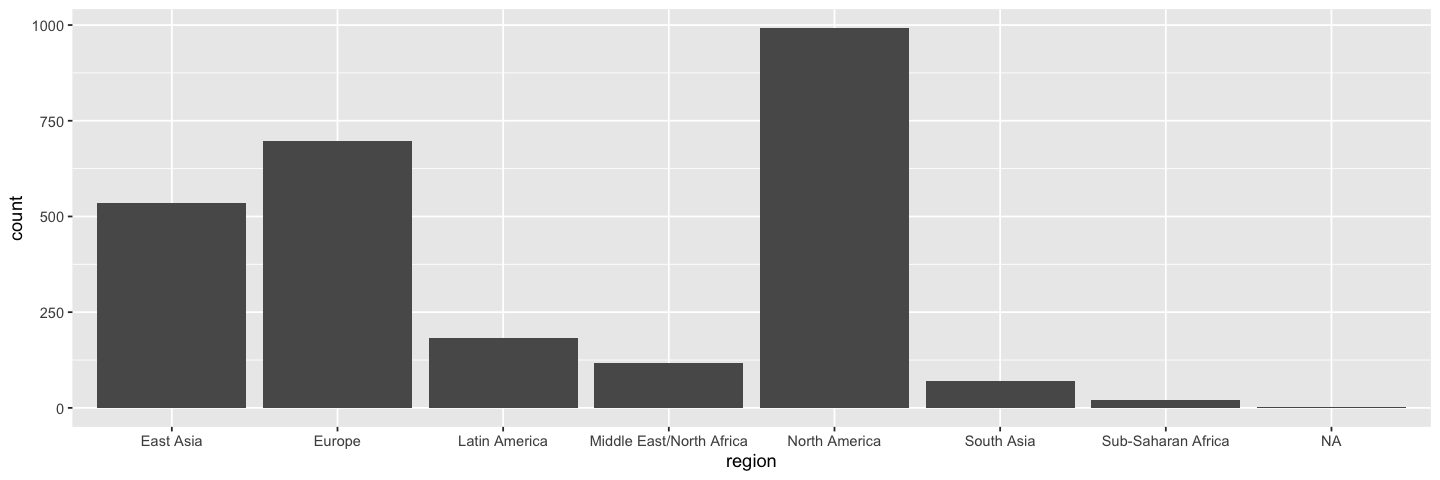

In [7]:
ggplot(data = bil) + geom_bar(mapping = aes(x = region))

If instead we are interested in the net worth, a bar plot is no longer applicable as every billionare potentially has a different net worth. Instead we create a **histogram**. The command to do this is **geom_histogram**.

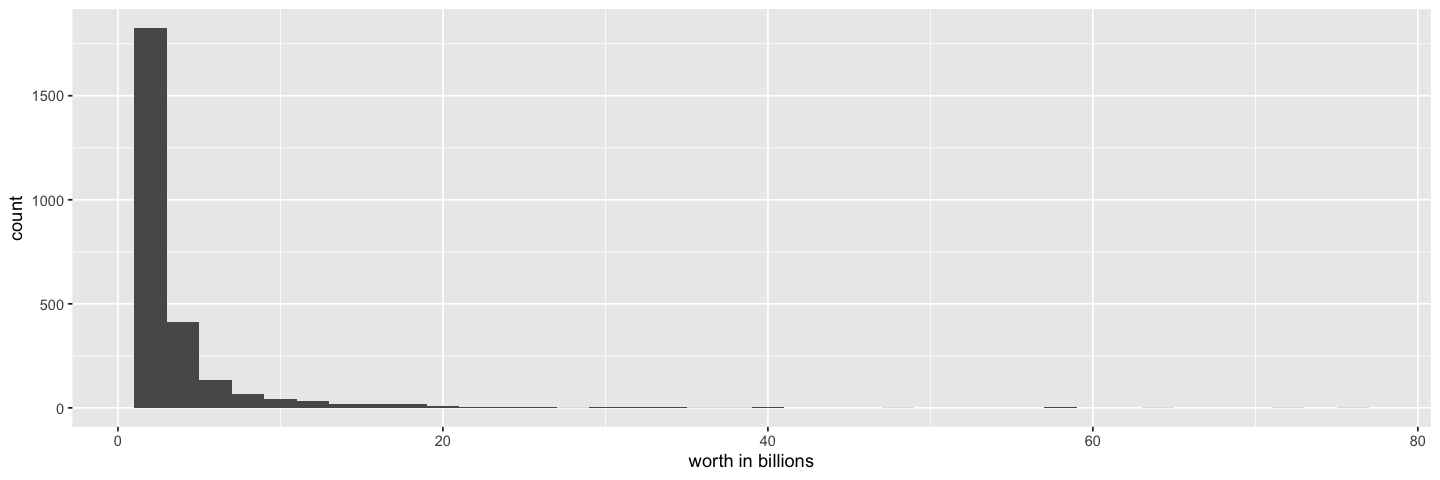

In [9]:
bil %>% ggplot +
    geom_histogram(mapping = aes(x = `worth in billions`), 
                   binwidth = 2)

What can you see from this plot? 

Most billionaires are worth a paltry \\$1-5b. However, the distribution has a "long tail": there are some billionaires who are worth as much as \\$60-80b. Interestingly, the income distribution among billionaires looks quite a bit like the income distribution in society as a whole. Even the .001% have their 1%.

We can use the **geom_histogram** to visualize other features in the dataset. Let's look at the disribution of the ages of billionaires. 

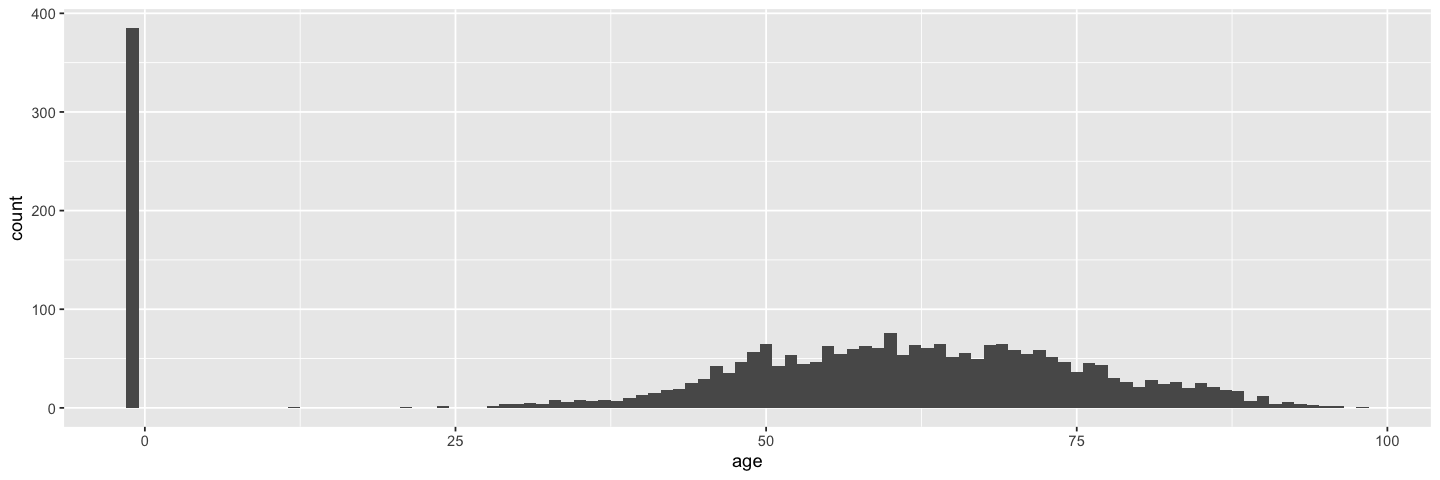

In [10]:
bil %>% mutate(age = ifelse(is.na(age), -1, age)) %>% ggplot() +
    geom_histogram(mapping = aes(x = age), binwidth = 1)

Typical values of `age` in these data range from about 30 to 90. We see a very unusual spike around zero. Let us try to investigate more by filtering the data set to contain only rows with age less than 10.   

In [11]:
filter(bil, age < 10) %>% arrange(age) %>% print

# A tibble: 385 × 22
     age category   citizenship company.name company.type `country code` founded
   <int> <chr>      <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financial  Saudi Arab… Rolaco Trad… new          SAU               1968
 2    -1 Financial  Hong Kong   Swire        new          HKG               1816
 3    -1 Traded Se… Bahrain     YBA Kanoo    new          BHR               1890
 4    -1 New Secto… Japan       Otsuka Hold… new          JPN               1921
 5    -1 Traded Se… Japan       Sony         new          JPN               1946
 6    -1 Traded Se… France      Chanel       new          FRA               1909
 7    -1 Non-Trade… Mexico      Groupo IUSA  new          MEX               1939
 8    -1 Financial  Mexico      Pulsar Inte… new          MEX               1981
 9    -1 Traded Se… Netherlands Heineken In… new          NLD               1864
10    -1 NA         United Sta… MBNA         subsidiary   USA               1982
# ℹ 375

These represent missing data where we **do not know** the person's age. Here `-1` can not be a valid entry of ages, according to common sense. Unfortunately, `R` does not have human common sense.  We'll translate this for `R` by *recoding* all values of -1 to `NA`.

In [12]:
 bil <- mutate(bil, age = na_if(age, -1))

The `na_if(a,b)` function as setting `a` to be equal to `NA` if `a==b`.

A good way to get a sense of typical values is by looking at percentiles. The $p$th percentile of a column is the number $x$ for which $p$% of the values are less than or equal to $x$. The best known example is the *median*: half the values are below the median.

In [13]:
q <- quantile(bil$age, probs=c(.01, .5, .99), na.rm=T)
print(q)

   1%   50%   99% 
32.28 62.00 90.00 


This tells us that 98% of the billionaires are between 32 and 90. Let us redo the visualization with extreme values filtered out.

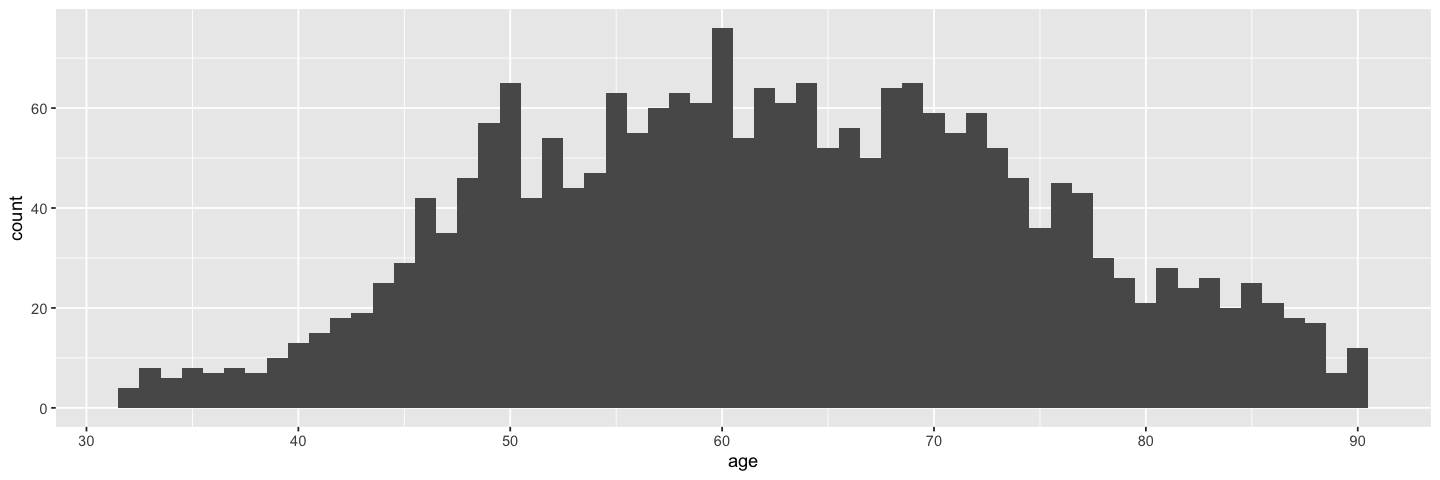

In [14]:
bil %>% mutate(age = ifelse(is.na(age), -1, age)) %>% filter(between(age,32,90))  %>%  ggplot() +
    geom_histogram(mapping = aes(x = age), binwidth = 1)

### 2.2.2 Diamond pricing
Here is another example where EDA turns up something unexpected. Let's look at the distribution of `diamonds$carat`.

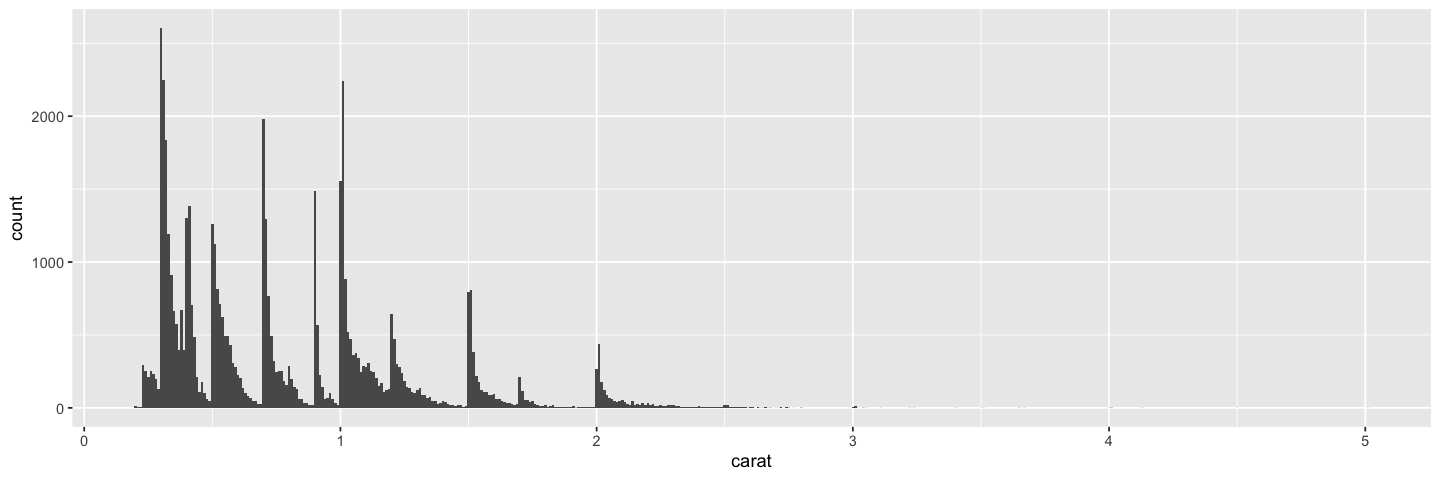

In [15]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = carat), 
                   binwidth = .01)

What can you see from this plot? 

There are a lot of interesting, unexpected patters in this figure, which is almost always true with any real data. Let's first focus on the diamonds that are larger than 3 carats.

In [16]:
filter(diamonds, carat > 3) %>% arrange(carat) %>% print

# A tibble: 32 × 10
   carat cut     color clarity depth table price     x     y     z
   <dbl> <ord>   <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  3.01 Premium I     I1       62.7    58  8040  9.1   8.97  5.67
 2  3.01 Premium F     I1       62.2    56  9925  9.24  9.13  5.73
 3  3.01 Fair    H     I1       56.1    62 10761  9.54  9.38  5.31
 4  3.01 Premium G     SI2      59.8    58 14220  9.44  9.37  5.62
 5  3.01 Ideal   J     SI2      61.7    58 16037  9.25  9.2   5.69
 6  3.01 Ideal   J     I1       65.4    60 16538  8.99  8.93  5.86
 7  3.01 Premium I     SI2      60.2    59 18242  9.36  9.31  5.62
 8  3.01 Fair    I     SI2      65.8    56 18242  8.99  8.94  5.9 
 9  3.01 Fair    I     SI2      65.8    56 18242  8.99  8.94  5.9 
10  3.01 Good    I     SI2      63.9    60 18242  9.06  9.01  5.77
# ℹ 22 more rows


Okay, now let us zoom into the `carat` range around 1.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


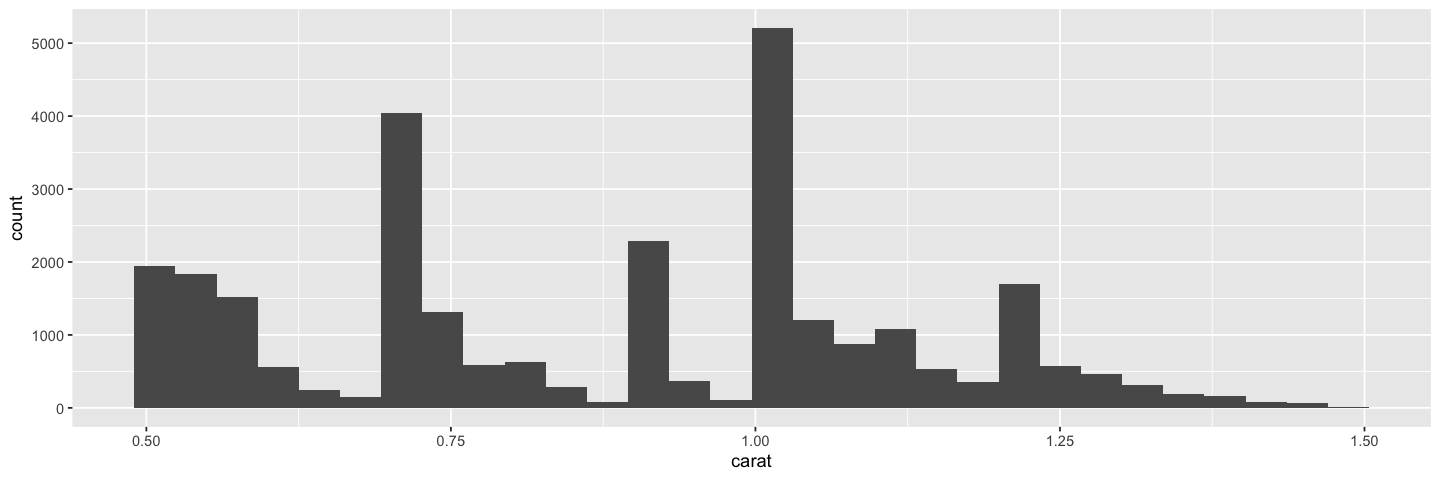

In [17]:
filter(diamonds, carat > 0.5, carat < 1.5) %>% 
    ggplot() + geom_histogram(mapping = aes(x = carat))

What might explain the strange histogram above? Tendency to round the `carat` values? It seems like certain values are particularly likely to be rounded. Let's refine the plot using the `breaks=` option to investigate further.

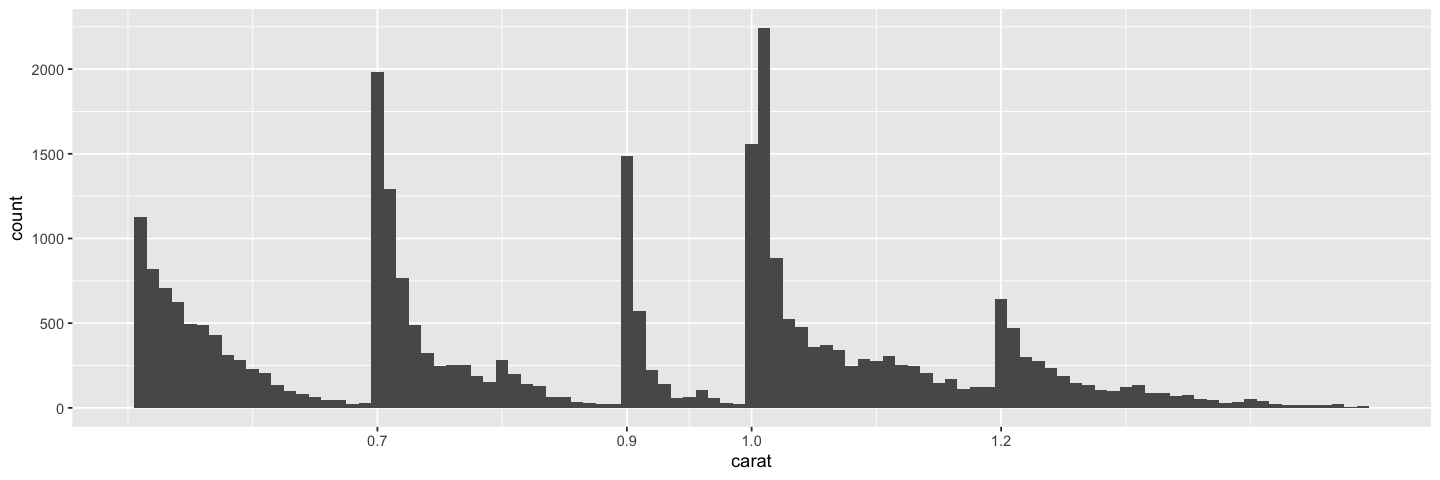

In [18]:
diamonds %>% filter(carat > 0.5, carat < 1.5) %>% 
ggplot() + geom_histogram(mapping = aes(x = carat), 
    binwidth = 0.01) + scale_x_continuous(breaks=c(.7,.9,1.,1.2))

It seems that diamonds of certain carats are preferred in the market. Does the same preference exists in the pricing of diamonds? 

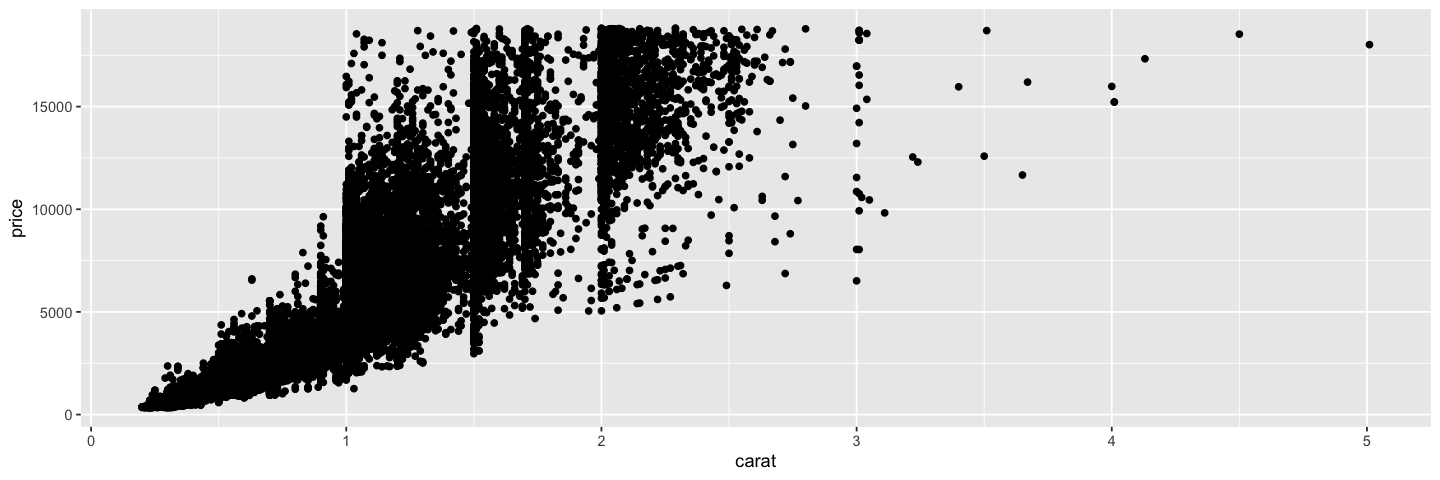

In [19]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price))

With so many points on top of each other, it is hard to see what is going on in this plot. Sometimes setting the transparency of points using `alpha` can help.

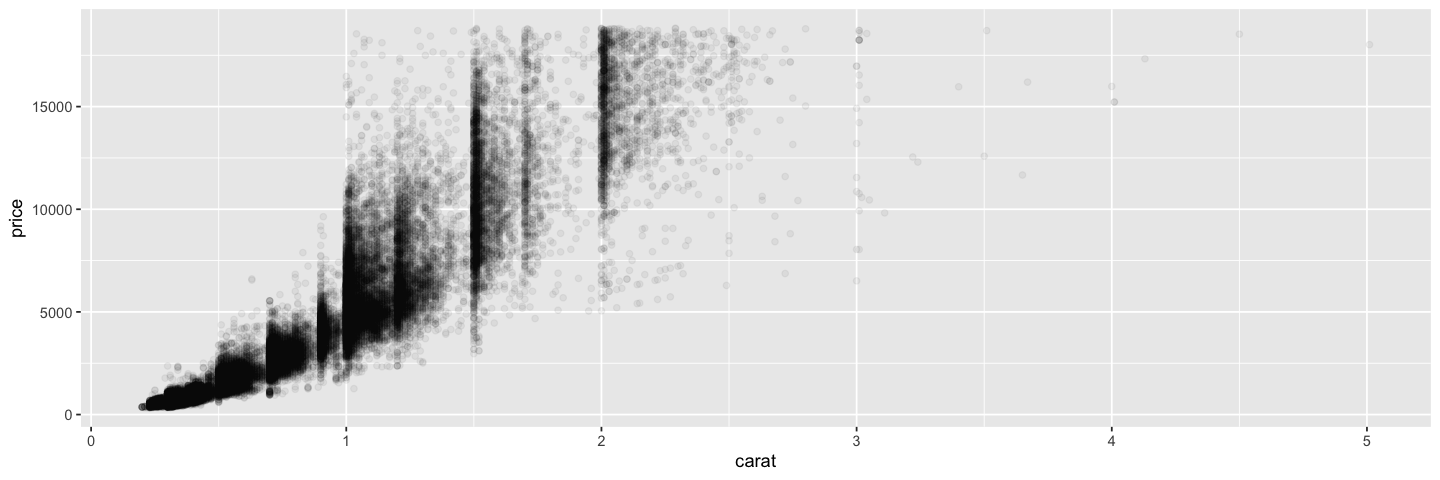

In [20]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price), alpha = 0.05)

What can you see from this plot?

We can also use `geom_bin2d` and `geom_hex` to visualize a two-dimensional scatter plot with (too) many data points. 

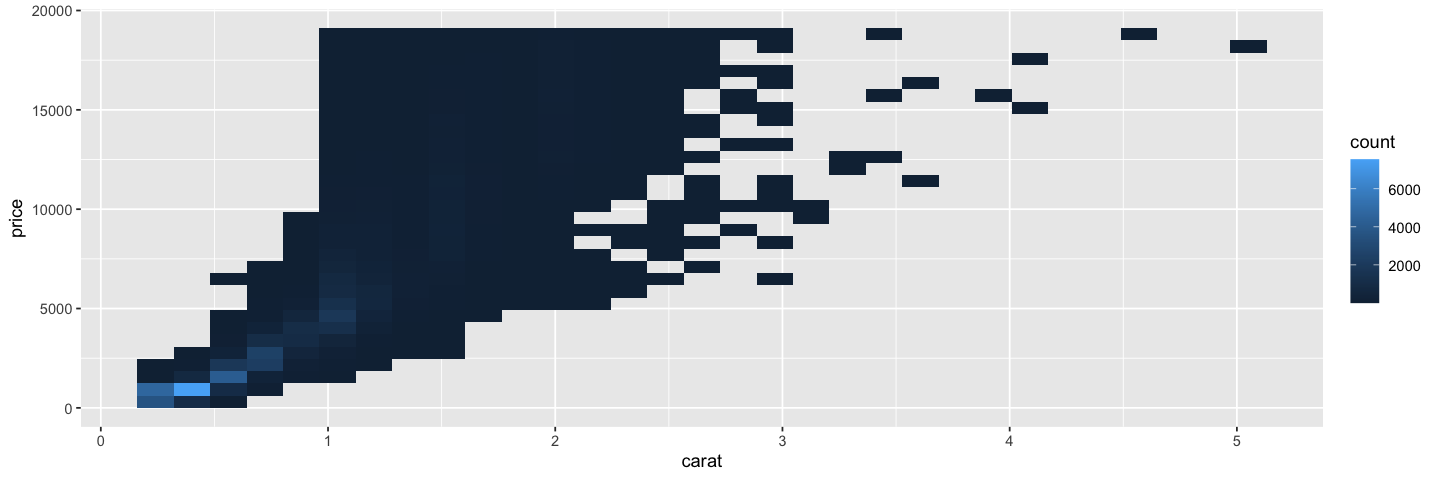

In [21]:
ggplot(data = diamonds) +
    geom_bin2d(mapping = aes(x = carat, y = price))


The downloaded binary packages are in
	/var/folders/7k/pmrkdmm532g7zc20cgygtd4w0000gn/T//Rtmps7pj6W/downloaded_packages


Warning message:
“package ‘hexbin’ was built under R version 4.3.3”


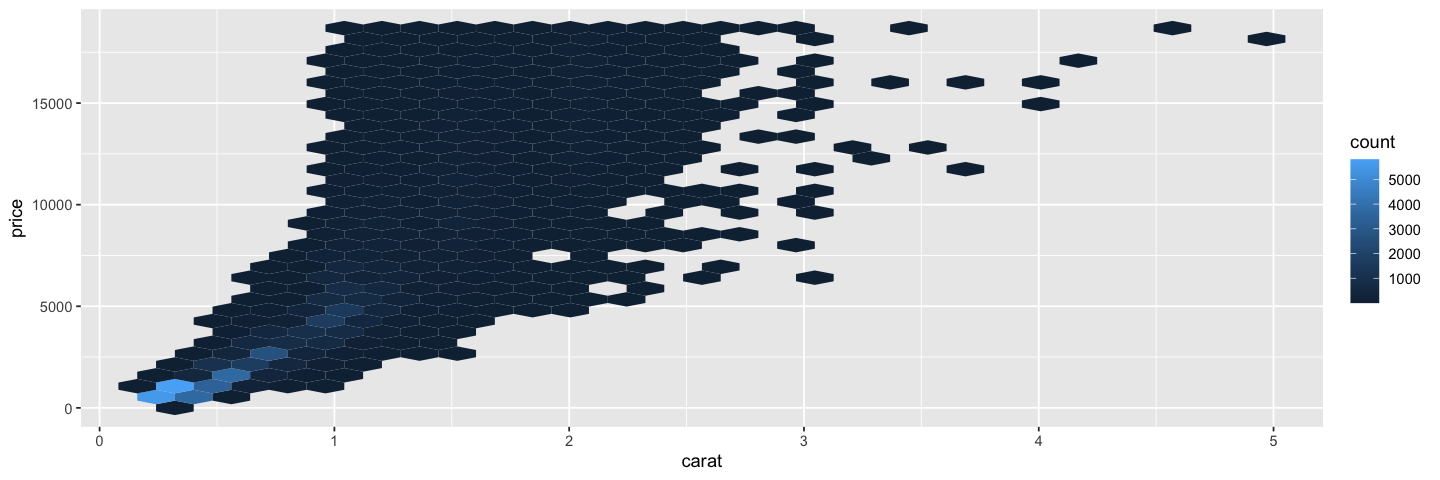

In [25]:
install.packages('hexbin')
library(hexbin)

ggplot(data = diamonds) +
    geom_hex(mapping = aes(x = carat, y = price))

Let us try to see what happens if we use a boxplot with 2 continuous variables: `price` as a function of `carat` for the `diamonds` tibble.

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


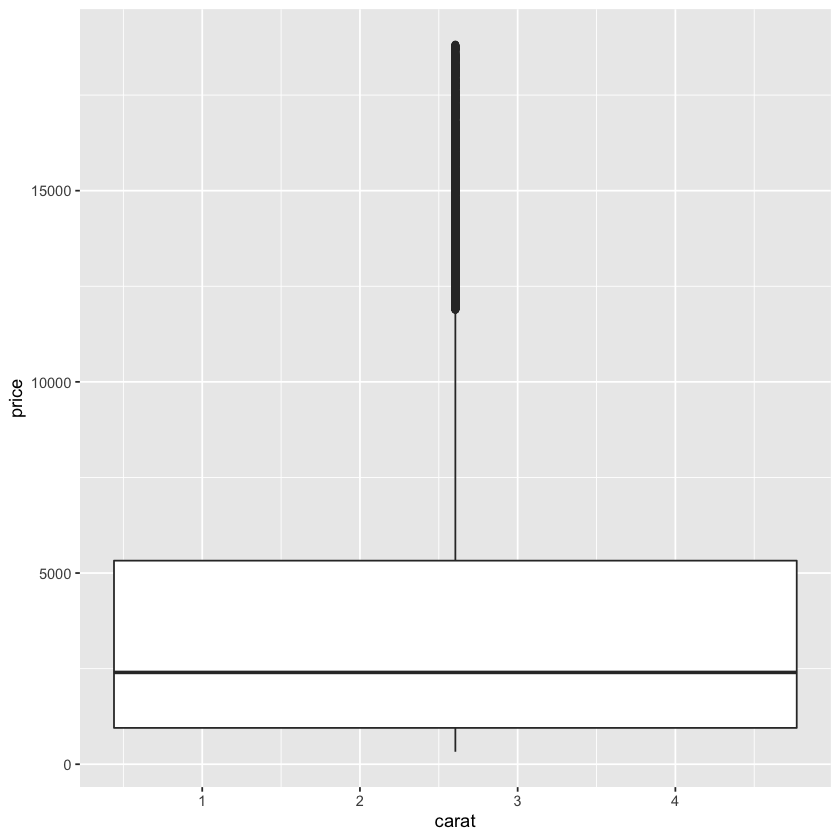

In [38]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price))

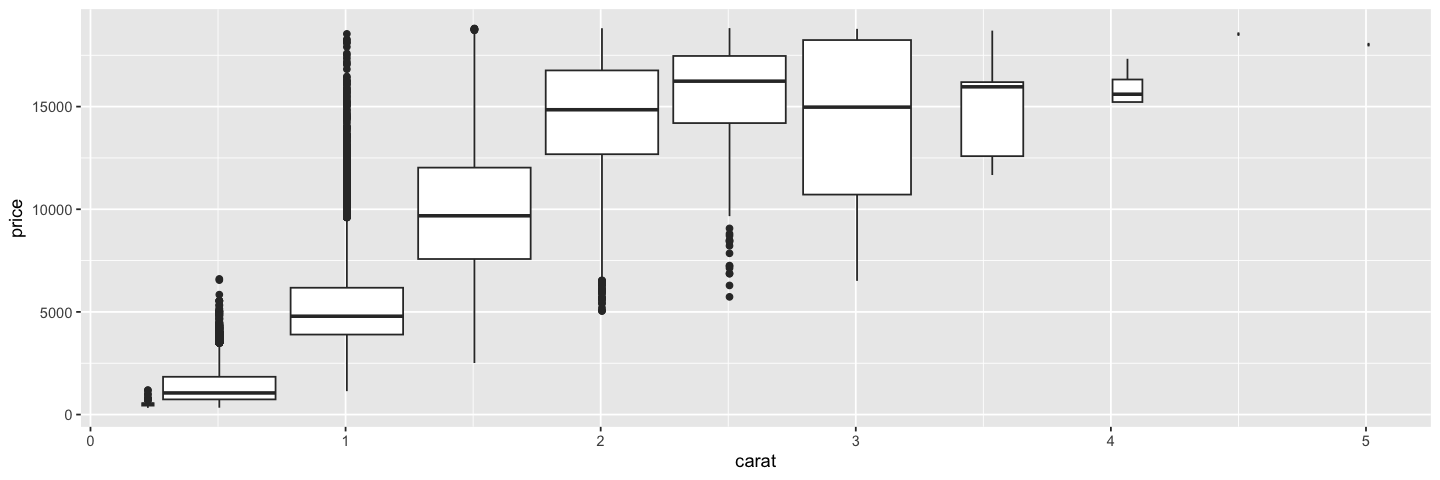

In [26]:
## Add the group info as the warning message suggested. 
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price, group = cut_width(carat, 0.5)))

If "outliers" sit on top of each other, you could adjust the transparency with `outlier.alpha`.

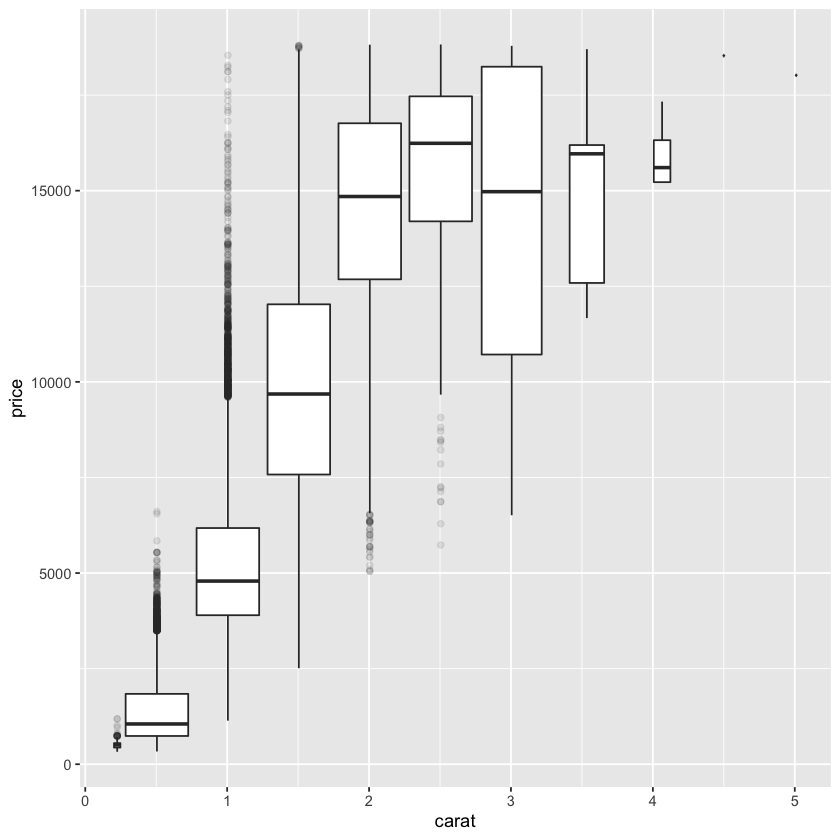

In [40]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price, group = cut_width(carat, 0.5)), outlier.alpha = 0.1)

### 2.2.3 MPG 

We can map a categorical variable to, say, the **color** aesthetic in a frequency polygon of a continuous variable. For this, we will explore the `mpg` data set. 

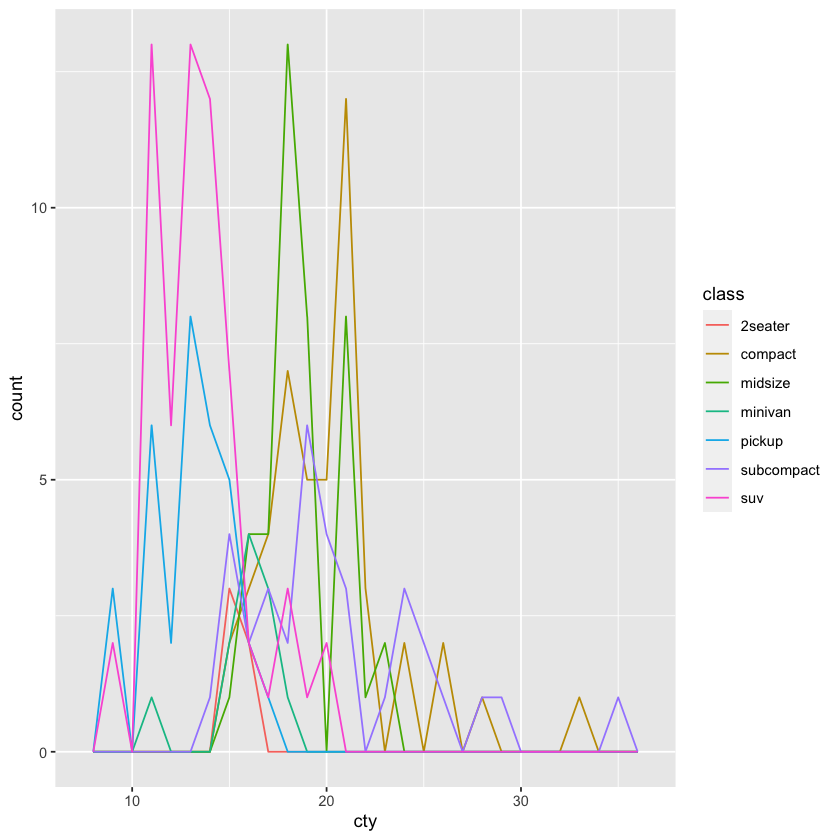

In [20]:
ggplot(data = mpg) +
    geom_freqpoly(mapping = aes(x = cty, color = class), binwidth = 1)

Mapping the `color` aesthetic to the `class` variable in a histogram does not have a good effect.

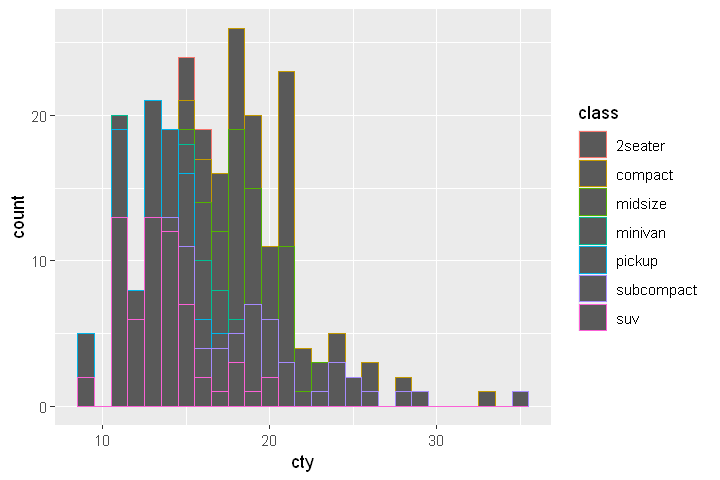

In [21]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, color = class), binwidth = 1)

Changing the **fill** aesthetic to the **color** aesthetic improves the appearance but the plot remains problematic.

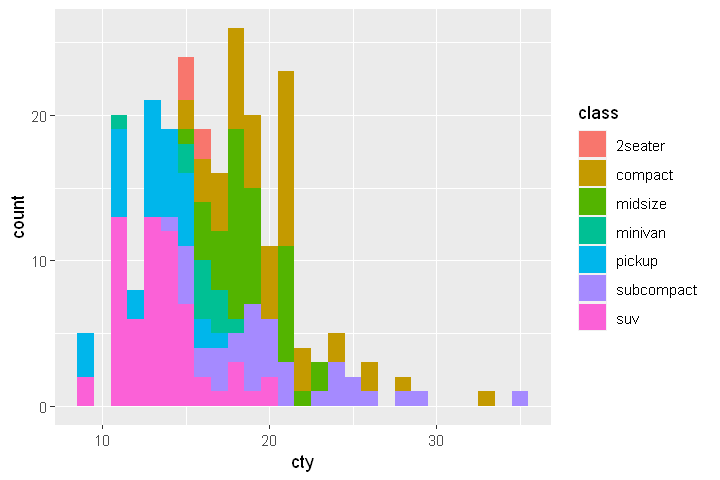

In [22]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, fill = class), binwidth = 1)

Another tool that we have seen that could come handy for a categorical-continuous pair is the **boxplot**.

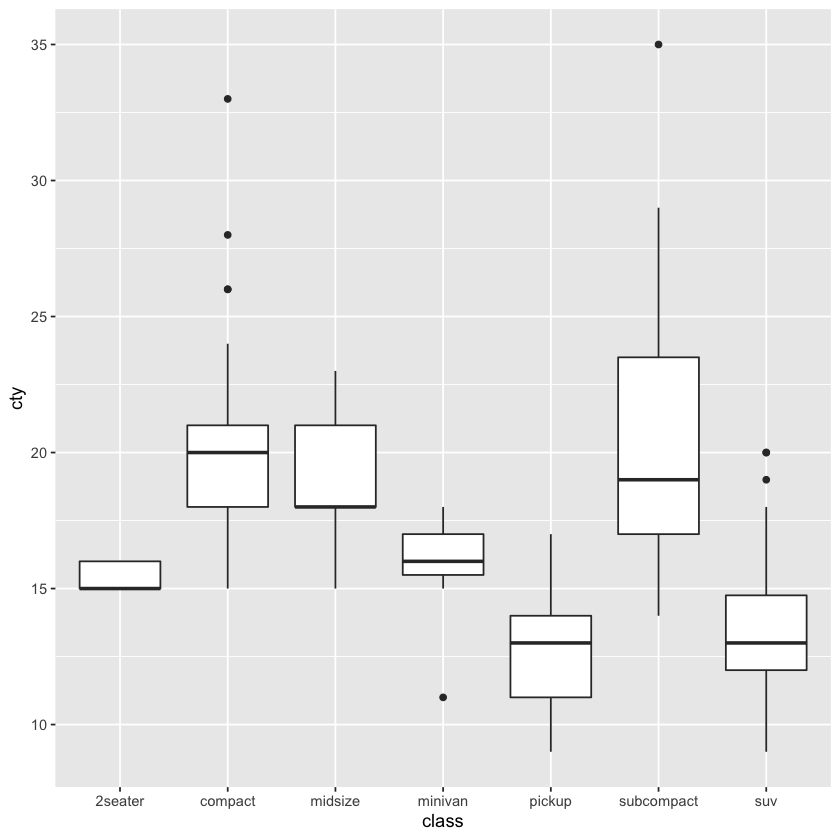

In [24]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = class, y = cty))

* The lower and upper hinges correspond to the first and third quartiles (the 25th and 75th percentiles).
* The upper whisker extends from the hinge to the largest value no further than 1.5 * IQR from the hinge (where IQR is the inter-quartile range, or distance between the first and third quartiles).
* The lower whisker extends from the hinge to the smallest value at most 1.5 * IQR of the hinge.
* Data beyond the end of the whiskers are called "outlying" points and are plotted individually.

To replot with `class` values listed in order of the median value for `cty`, we can use the `reorder()` function.

```
reorder(cat, con, FUN = median)
```

reorders the levels of the categorical variable `cat` according the continuous variable `con`. The function `median()` is applied the the `con` values corresponding to a fixed level of `cat`. Default value of the `FUN` argument is `mean`.

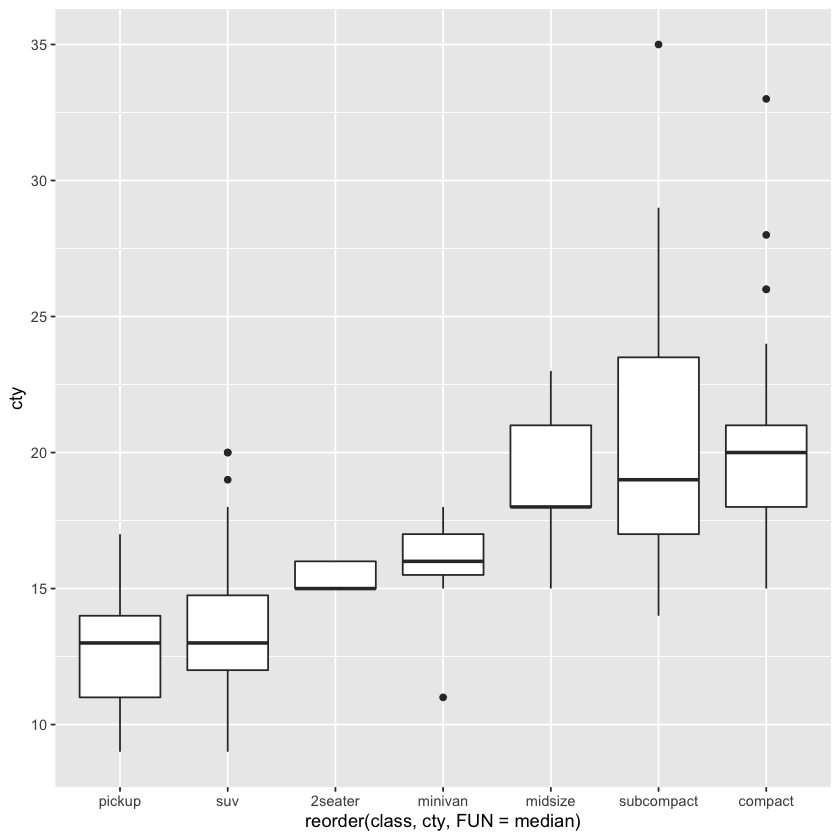

In [25]:
ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty))

We can flip the x, y axes if the categorical level names are long

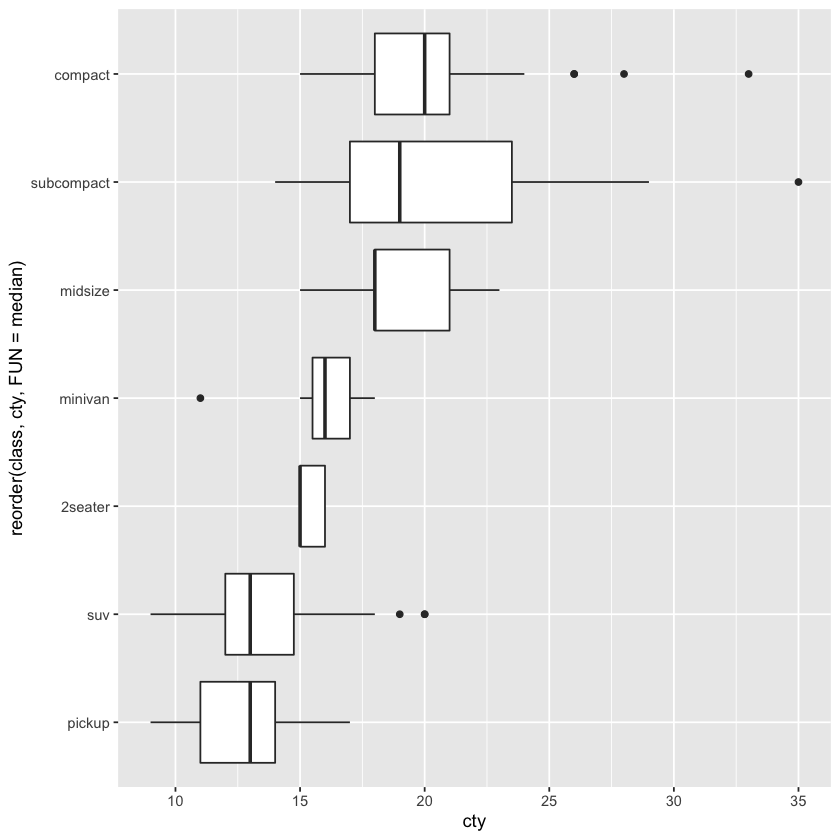

In [26]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) +
    coord_flip()

Contrast this with faceting the `cty` histogram on the `class` variable.

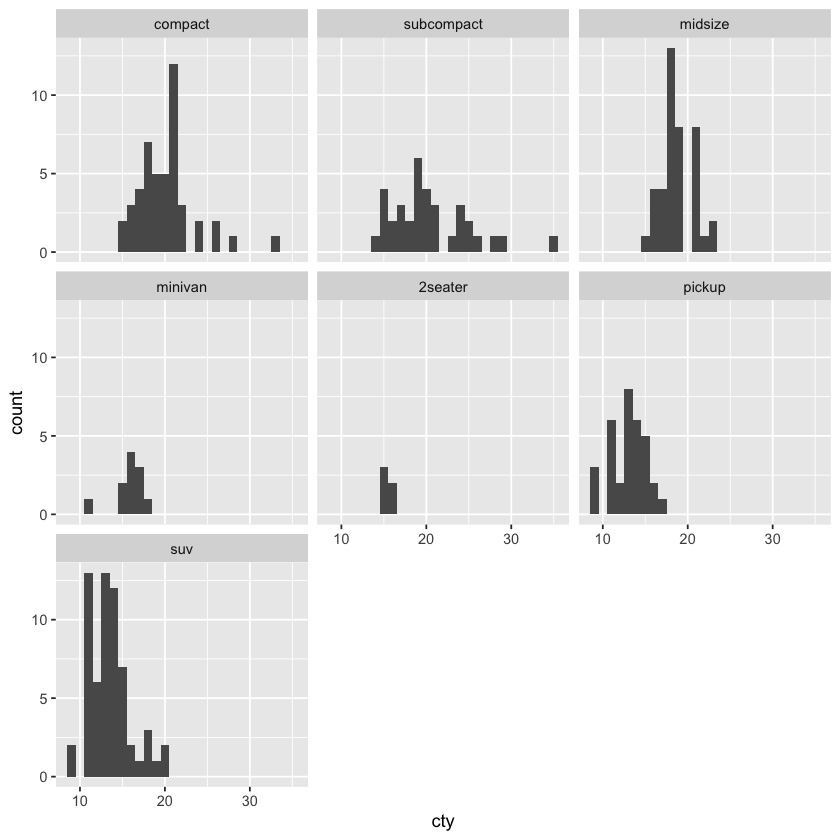

In [27]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty), binwidth = 1) +
    facet_wrap(~ reorder(class, desc(cty), FUN = median))

We can also superimpose the points themselves on top of the boxplot by adding `geom_jitter`. But it is a good idea to hide the outliers by setting `outlier.shape = NA` first.

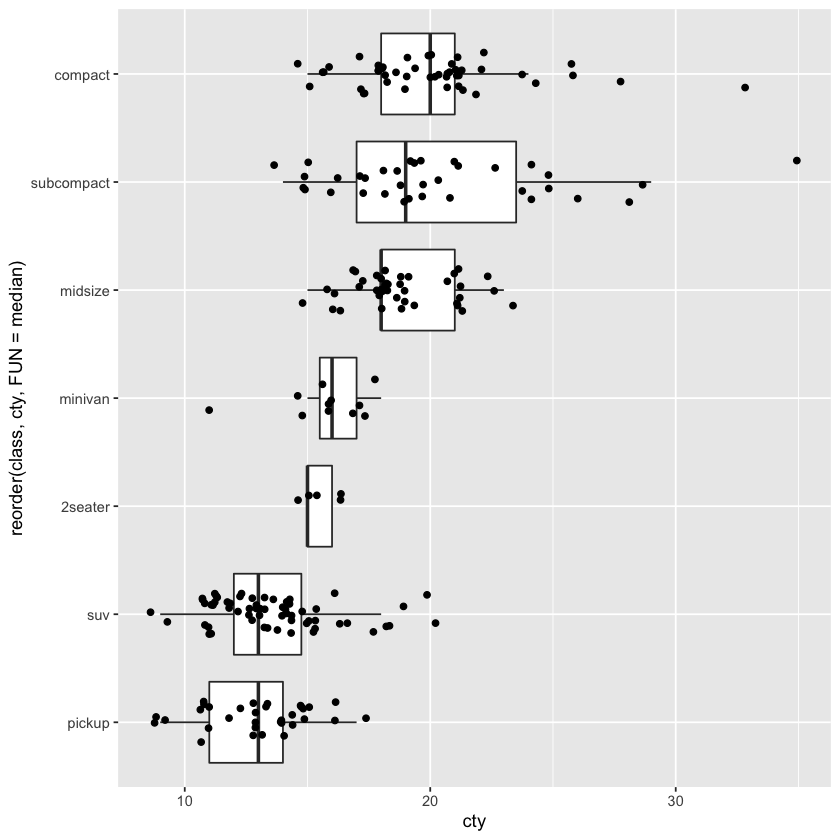

In [28]:
ggplot(data = mpg, mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) + 
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = .2) +
    coord_flip()

When it comes to a categorical-categorical pair, the function `geom_count` can be used to visualize two categorical variables.

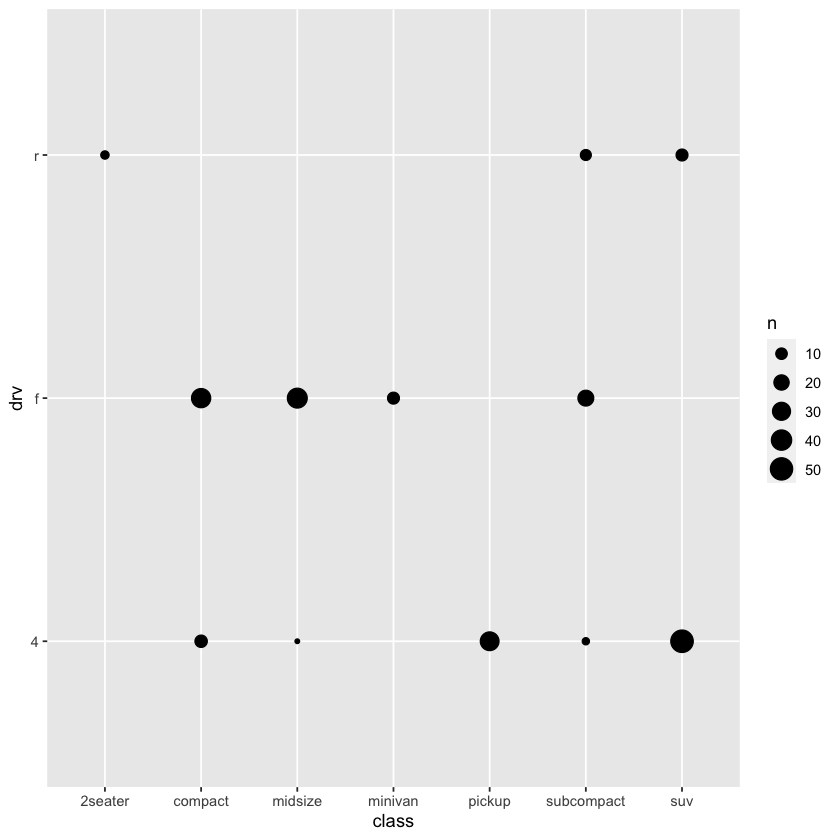

In [29]:
ggplot(data = mpg) +
    geom_count(mapping = aes(x = class, y = drv))

We can compute these numbers using `count()`.

In [30]:
mpg %>%
    count(class, drv)

class,drv,n
<chr>,<chr>,<int>
2seater,r,5
compact,4,12
compact,f,35
midsize,4,3
midsize,f,38
minivan,f,11
pickup,4,33
subcompact,4,4
subcompact,f,22


These counts can be fed to other geometries.

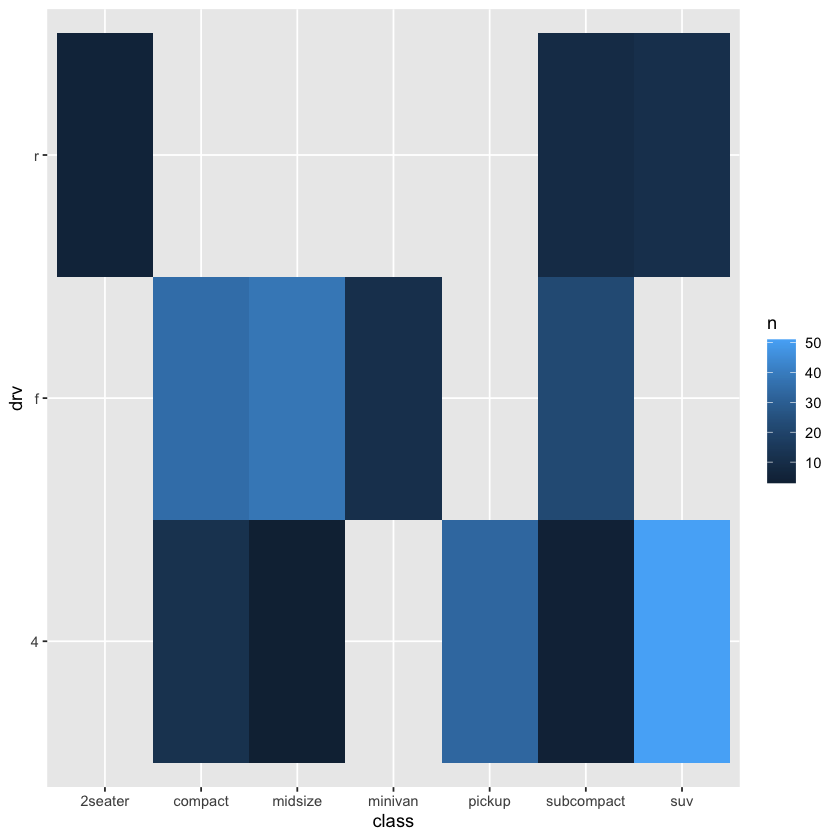

In [31]:
mpg %>%
    count(class, drv) %>%
    ggplot() +
        geom_tile(mapping = aes(x = class, y = drv, fill = n))